# Preprocessing, Training and Modeling

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
df = pd.read_csv('eda_complete_df.csv')

In [3]:
df

,iid,id,gender,idg,wave,round,order,partner,pid,match,...,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,field_broad
0,1,1.0,0,1,1,10,4,1,11.0,0,...,8.0,8.0,7.0,7.0,1.0,1.0,0.0,0.0,0.0,2
1,1,1.0,0,1,1,10,3,2,12.0,0,...,8.0,8.0,7.0,7.0,1.0,1.0,0.0,0.0,0.0,2
2,1,1.0,0,1,1,10,10,3,13.0,1,...,8.0,8.0,7.0,7.0,1.0,1.0,0.0,0.0,0.0,2
3,1,1.0,0,1,1,10,5,4,14.0,1,...,8.0,8.0,7.0,7.0,1.0,1.0,0.0,0.0,0.0,2
4,1,1.0,0,1,1,10,7,5,15.0,1,...,8.0,8.0,7.0,7.0,1.0,1.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6317,552,22.0,1,44,21,22,8,17,525.0,0,...,3.0,9.0,4.0,7.0,2.0,0.0,0.0,0.0,1.0,4
6318,552,22.0,1,44,21,22,5,18,526.0,0,...,3.0,9.0,4.0,7.0,2.0,0.0,0.0,0.0,1.0,4
6319,552,22.0,1,44,21,22,4,19,527.0,0,...,3.0,9.0,4.0,7.0,2.0,0.0,0.0,0.0,1.0,4
6320,552,22.0,1,44,21,22,10,20,528.0,0,...,3.0,9.0,4.0,7.0,2.0,0.0,0.0,0.0,1.0,4


In [4]:
df.columns[:100]

Index(['iid', 'id', 'gender', 'idg', 'wave', 'round', 'order', 'partner',
       'pid', 'match', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att',
       'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o',
       'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o',
       'prob_o', 'met_o', 'age', 'field_cd', 'race', 'imprace', 'imprelig',
       'goal', 'date', 'go_out', 'career_c', 'sports', 'tvsports', 'exercise',
       'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading',
       'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga',
       'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1',
       'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1',
       'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1',
       'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1',
       'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'dec',
       'attr', 'sinc'

In [5]:
df.columns[100:]

Index(['attr7_2', 'sinc7_2', 'intel7_2', 'fun7_2', 'amb7_2', 'shar7_2',
       'attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2',
       'attr4_2', 'sinc4_2', 'intel4_2', 'fun4_2', 'amb4_2', 'shar4_2',
       'attr2_2', 'sinc2_2', 'intel2_2', 'fun2_2', 'amb2_2', 'shar2_2',
       'attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2', 'attr5_2',
       'sinc5_2', 'intel5_2', 'fun5_2', 'amb5_2', 'you_call', 'them_cal',
       'date_3', 'numdat_3', 'num_in_3', 'field_broad'],
      dtype='object')

## Preprocessing 

**One-hot Enconding for Categorical Data**

In [6]:
categorical = ['field_broad', 'race', 'goal', 'date', 'go_out']

In [7]:
df = pd.get_dummies(df, columns=['field_broad', 'race', 'goal', 'date', 'go_out'])

In [8]:
df

,iid,id,gender,idg,wave,round,order,partner,pid,match,...,date_5.0,date_6.0,date_7.0,go_out_1.0,go_out_2.0,go_out_3.0,go_out_4.0,go_out_5.0,go_out_6.0,go_out_7.0
0,1,1.0,0,1,1,10,4,1,11.0,0,...,0,0,1,1,0,0,0,0,0,0
1,1,1.0,0,1,1,10,3,2,12.0,0,...,0,0,1,1,0,0,0,0,0,0
2,1,1.0,0,1,1,10,10,3,13.0,1,...,0,0,1,1,0,0,0,0,0,0
3,1,1.0,0,1,1,10,5,4,14.0,1,...,0,0,1,1,0,0,0,0,0,0
4,1,1.0,0,1,1,10,7,5,15.0,1,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6317,552,22.0,1,44,21,22,8,17,525.0,0,...,0,0,0,1,0,0,0,0,0,0
6318,552,22.0,1,44,21,22,5,18,526.0,0,...,0,0,0,1,0,0,0,0,0,0
6319,552,22.0,1,44,21,22,4,19,527.0,0,...,0,0,0,1,0,0,0,0,0,0
6320,552,22.0,1,44,21,22,10,20,528.0,0,...,0,0,0,1,0,0,0,0,0,0


**Upsampling for Class Imbalance** 

In [9]:
match_maj = df[df['match'] == 0]
match_min = df[df['match'] == 1]

In [10]:
class_0 = df[df['match'] == 0].shape[0]
match_min_upsampled = match_min.sample(replace=True, n=class_0, random_state=0)

In [11]:
class_0

5324

In [12]:
df = pd.concat([match_maj, match_min_upsampled])

In [13]:
df.shape

(10648, 164)

## Defining the Variables 

In [14]:
df.columns[100:]

Index(['amb7_2', 'shar7_2', 'attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2',
       'amb1_2', 'shar1_2', 'attr4_2', 'sinc4_2', 'intel4_2', 'fun4_2',
       'amb4_2', 'shar4_2', 'attr2_2', 'sinc2_2', 'intel2_2', 'fun2_2',
       'amb2_2', 'shar2_2', 'attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2',
       'amb3_2', 'attr5_2', 'sinc5_2', 'intel5_2', 'fun5_2', 'amb5_2',
       'you_call', 'them_cal', 'date_3', 'numdat_3', 'num_in_3',
       'field_broad_1', 'field_broad_2', 'field_broad_3', 'field_broad_4',
       'race_1.0', 'race_2.0', 'race_3.0', 'race_4.0', 'race_5.0', 'goal_1.0',
       'goal_2.0', 'goal_3.0', 'goal_4.0', 'goal_5.0', 'goal_6.0', 'date_1.0',
       'date_2.0', 'date_3.0', 'date_4.0', 'date_5.0', 'date_6.0', 'date_7.0',
       'go_out_1.0', 'go_out_2.0', 'go_out_3.0', 'go_out_4.0', 'go_out_5.0',
       'go_out_6.0', 'go_out_7.0'],
      dtype='object')

In [15]:
features = ['gender', 'samerace', 'age', 'imprace',
       'imprelig', 'sports', 'tvsports', 'exercise',
       'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading',
       'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga',
       'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1',
       'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1',
       'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1',
       'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1',
       'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'dec',
       'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met',
       'match_es', 'attr7_2',
       'sinc7_2', 'intel7_2', 'fun7_2', 'amb7_2', 'shar7_2', 'attr1_2',
       'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2', 'attr4_2',
       'sinc4_2', 'intel4_2', 'fun4_2', 'amb4_2', 'shar4_2', 'attr2_2',
       'sinc2_2', 'intel2_2', 'fun2_2', 'amb2_2', 'shar2_2', 'attr3_2',
       'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2', 'attr5_2', 'sinc5_2',
       'intel5_2', 'fun5_2', 'amb5_2',
       'field_broad_1', 'field_broad_2', 'field_broad_3', 'field_broad_4',
       'race_1.0', 'race_2.0', 'race_3.0', 'race_4.0', 'race_5.0', 'goal_1.0',
       'goal_2.0', 'goal_3.0', 'goal_4.0', 'goal_5.0', 'goal_6.0', 'date_1.0',
       'date_2.0', 'date_3.0', 'date_4.0', 'date_5.0', 'date_6.0', 'date_7.0',
       'go_out_1.0', 'go_out_2.0', 'go_out_3.0', 'go_out_4.0', 'go_out_5.0',
       'go_out_6.0', 'go_out_7.0']
X = df[features]

# removed 'dec_o' from X, we want to predict from participant's perspective
# removed data from survey 3-4 weeks after event

y = df['match']

## Training and Scaling the Data

In [16]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0)

In [17]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)

**Feature Selection**

In [18]:
from sklearn.feature_selection import SelectKBest, chi2
from numpy import array 

In [19]:
X_train

array([[-0.98902477, -0.82507085,  0.22053636, ..., -0.10391643,
        -0.12737835, -0.05945083],
       [-0.98902477, -0.82507085, -1.20216035, ..., -0.10391643,
        -0.12737835, -0.05945083],
       [ 1.01109702, -0.82507085, -0.34854232, ..., -0.10391643,
        -0.12737835, 16.82062226],
       ...,
       [-0.98902477, -0.82507085, -0.34854232, ..., -0.10391643,
        -0.12737835, -0.05945083],
       [ 1.01109702,  1.21201712,  0.22053636, ..., -0.10391643,
        -0.12737835, -0.05945083],
       [ 1.01109702, -0.82507085,  2.21231176, ..., -0.10391643,
        -0.12737835, -0.05945083]])

In [20]:
select = SelectKBest(score_func=chi2, k=7)
X_new = select.fit_transform(X, y)

In [21]:
X_new.shape

(10648, 7)

In [22]:
filter = select.get_support()
feat_array = array(features)
feat_array[filter]

array(['dec', 'attr', 'fun', 'shar', 'like', 'prob', 'match_es'],
      dtype='<U13')

In [23]:
# new variables after feature selection 

features = ['dec', 'attr', 'fun', 'shar', 'like', 'prob', 'match_es']
X = df[features]
y = df['match']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0)

## Possible Machine Learning Algorithms



1. Logistic Regression 
2. Decision Tree (Gini index vs Entropy) 
3. Random Forests
4. Support Vector Machines

# Logistic Regression 

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [25]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [26]:
# accuracy score on the training set 

lr.score(X_train, y_train)

0.8473820145574078

In [27]:
# accuracy score on the test set
lr.score(X_test, y_test)

0.8417840375586855

In [28]:
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

[[ 702  327]
 [  10 1091]]


In [29]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.68      0.81      1029
           1       0.77      0.99      0.87      1101

    accuracy                           0.84      2130
   macro avg       0.88      0.84      0.84      2130
weighted avg       0.87      0.84      0.84      2130



## Hyperparameter Tuning

In [30]:
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
             'C': [100, 10, 1.0, 0.1, 0.01]}

In [31]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, n_jobs=4, cv=cv, error_score=0)
grid_lr = grid_search.fit(X_train, y_train)

In [32]:
grid_lr.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [33]:
# best score on training set with best parameters
grid_lr.best_score_

0.8475779668216901

In [34]:
y_pred_lrh = grid_lr.predict(X_test)

In [35]:
grid_lr.score(X_test, y_test)

0.8417840375586855

In [36]:
cm = confusion_matrix(y_test, y_pred_lrh)
print(cm)

[[ 704  325]
 [  12 1089]]


In [37]:
print(classification_report(y_test, y_pred_lrh))

              precision    recall  f1-score   support

           0       0.98      0.68      0.81      1029
           1       0.77      0.99      0.87      1101

    accuracy                           0.84      2130
   macro avg       0.88      0.84      0.84      2130
weighted avg       0.87      0.84      0.84      2130



In [38]:
tuples = list(zip(features, grid_lr.best_estimator_.coef_[0]))
coef_df = pd.DataFrame(tuples, columns=['Features', 'Coefficients'])
coef_df.iloc[0:50, :]

,Features,Coefficients
0,dec,4.914399
1,attr,-0.059765
2,fun,0.182192
3,shar,0.024151
4,like,0.006396
5,prob,0.163778
6,match_es,-0.010210


# Decision Tree

## Gini Index

In [39]:
# fitting decision tree on training data
clf = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0, criterion='gini')
clf = clf.fit(X_train, y_train)

In [40]:
clf.score(X_train, y_train)

0.8486733975111529

In [41]:
# accuracy score on test data
y_pred_dt = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred_dt)*100

84.03755868544602

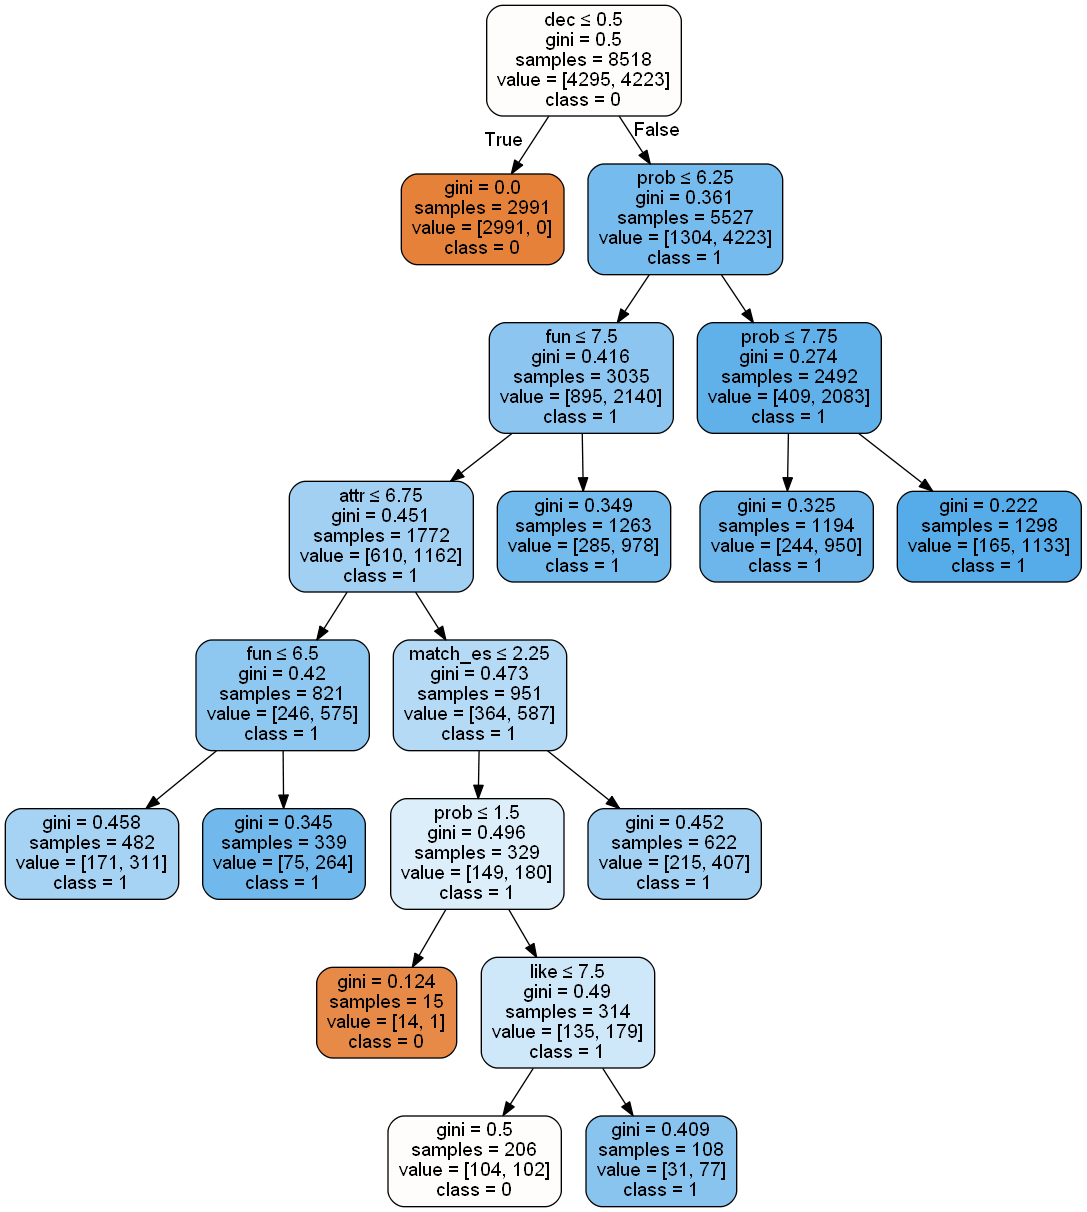

In [42]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('match_gini.png')
Image(graph.create_png())

In [43]:
print(confusion_matrix(y_test, y_pred_dt))

[[ 721  308]
 [  32 1069]]


In [44]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.70      0.81      1029
           1       0.78      0.97      0.86      1101

    accuracy                           0.84      2130
   macro avg       0.87      0.84      0.84      2130
weighted avg       0.86      0.84      0.84      2130



## Entropy

In [45]:
# fitting decision tree on training data
clf = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0, criterion='entropy')
clf = clf.fit(X_train, y_train)

In [46]:
clf.score(X_train, y_train)

0.8476168114580888

In [47]:
# accuracy score on test data
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)*100

84.64788732394366

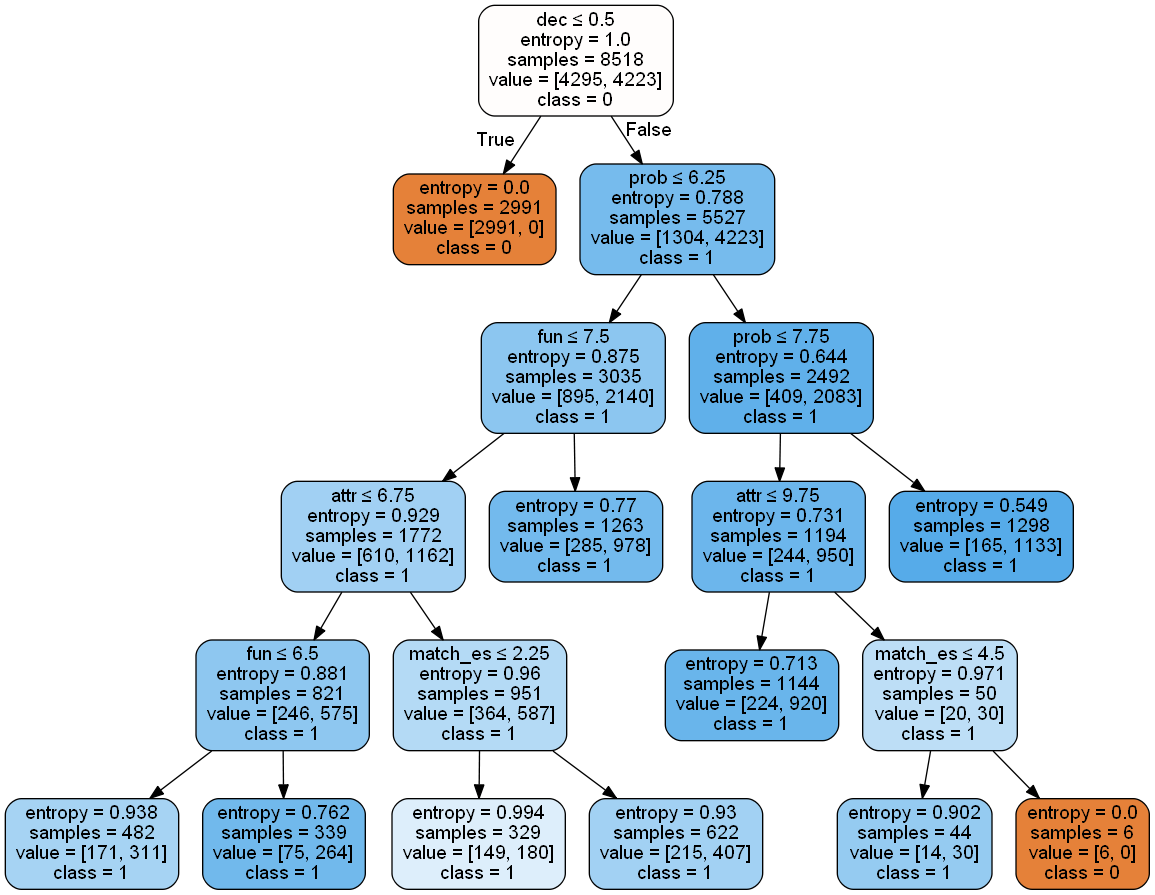

In [48]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('match_entropy.png')
Image(graph.create_png())

In [49]:
print(confusion_matrix(y_test, y_pred))

[[ 702  327]
 [   0 1101]]


In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.68      0.81      1029
           1       0.77      1.00      0.87      1101

    accuracy                           0.85      2130
   macro avg       0.89      0.84      0.84      2130
weighted avg       0.88      0.85      0.84      2130



# Random Forest Ensemble 

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV

## Hyperparameter Tuning

In [52]:
n_estimators = [int(x) for x in np.linspace(start=10, stop=110, num=11)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [53]:
param_grid = {'n_estimators': n_estimators,
             'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf,
             'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [54]:
# randomizedsearchCV 
rf = RandomForestClassifier(random_state=0)
rf_rand = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100,
                            cv=3, verbose=2, random_state=0, n_jobs=4)
rf_rand.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  58 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:   14.3s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   n_iter=100, n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100,
                                                         110]},
                   random_state=0, verbose=2)

In [55]:
rf_rand.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

In [56]:
# accuracy score on training set
rf_rand.score(X_train, y_train)

0.9802770603428035

In [57]:
# accuracy score on test set
rf_rand.score(X_test, y_test)

0.9206572769953052

In [58]:
y_pred = rf_rand.predict(X_test)

In [59]:
print(confusion_matrix(y_test, y_pred))

[[ 887  142]
 [  27 1074]]


In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1029
           1       0.88      0.98      0.93      1101

    accuracy                           0.92      2130
   macro avg       0.93      0.92      0.92      2130
weighted avg       0.93      0.92      0.92      2130



# Support Vector Machine 

In [61]:
from sklearn.svm import SVC

In [62]:
model = SVC(random_state=0)

In [63]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [64]:
model.score(X_train, y_train)

0.847147217656727

In [65]:
metrics.accuracy_score(y_test, y_pred)

0.8460093896713615

In [66]:
print(confusion_matrix(y_test,y_pred))

[[ 701  328]
 [   0 1101]]


In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.68      0.81      1029
           1       0.77      1.00      0.87      1101

    accuracy                           0.85      2130
   macro avg       0.89      0.84      0.84      2130
weighted avg       0.88      0.85      0.84      2130



## Hyperparameter Tuning

In [68]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
             'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel': ['rbf']}
grid_svc = GridSearchCV(SVC(random_state=0), param_grid, refit=True, verbose=3)
grid_svc.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.755, total=   1.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.721, total=   1.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.800, total=   1.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.746, total=   1.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.768, total=   1.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.831, total=   0.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.829, total=   0.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.846, total=   0.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.833, total=   0.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.846, total=   1.7s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.853, total=   1.6s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.861, total=   1.6s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.839, total=   1.6s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.836, total=   1.5s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.846, total=   1.4s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.853, total=   1.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.839, total=  24.1s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.836, total=  22.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.846, total=   4.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.853, total=   5.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.861, total=   4.6s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.839, total=   4.6s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.836, total=   4.1s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  7.2min finished


GridSearchCV(estimator=SVC(random_state=0),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [69]:
print(grid_svc.best_params_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [70]:
print(grid_svc.best_estimator_)

SVC(C=10, gamma=1, random_state=0)


In [71]:
y_pred = grid_svc.predict(X_test)

In [72]:
model.score(X_train, y_train)

0.847147217656727

In [73]:
metrics.accuracy_score(y_test, y_pred)

0.9431924882629108

In [74]:
print(confusion_matrix(y_test, y_pred))

[[ 937   92]
 [  29 1072]]


In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1029
           1       0.92      0.97      0.95      1101

    accuracy                           0.94      2130
   macro avg       0.95      0.94      0.94      2130
weighted avg       0.94      0.94      0.94      2130

